<a href="https://colab.research.google.com/github/sasireddyvari/Inventory_Management/blob/master/Model_with_93_4_accuracy_using_RandomforestRegressor_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np

In [5]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Ecommerce/E commerce Project/Data_ecommerce project.csv')

In [9]:
df.head()

,ORDERTYPE,CUSTOMER,ITEMCODE,ORDERDATE,ORDERNO,OREDEREDQUANTITY,DELIVERYDATE,INVOICENO,DELIVEREDQUANTITY
0,ES1,C00237,IT0001433,15-JAN-2014 12.00.00.000000000 AM,219856,15.0,16-FEB-2014 12.00.00.000000000 AM,21300726,15.0
1,ES1,C00237,IT0001016,15-JAN-2014 12.00.00.000000000 AM,219857,750.0,11-FEB-2014 12.00.00.000000000 AM,21300626,750.0
2,ES1,C00237,IT0001024,15-JAN-2014 12.00.00.000000000 AM,219857,320.0,16-FEB-2014 12.00.00.000000000 AM,21300727,320.0
3,ES1,C00237,IT0001084,15-JAN-2014 12.00.00.000000000 AM,219857,250.0,11-FEB-2014 12.00.00.000000000 AM,21300626,250.0
4,ES3,C00196,IT0001076,27-MAR-2014 12.00.00.000000000 AM,255311,250.0,28-MAR-2014 12.00.00.000000000 AM,21301499,250.0


In [10]:
# Get the shape of data
df.shape

(51290, 9)

In [11]:
# Checking any null values
df.isnull().sum()

ORDERTYPE            0
CUSTOMER             0
ITEMCODE             0
ORDERDATE            0
ORDERNO              0
OREDEREDQUANTITY     0
DELIVERYDATE         0
INVOICENO            0
DELIVEREDQUANTITY    0
dtype: int64

In [12]:
## Summary statistics for numerical fields
df.describe() # Negative values are there and will be removed after feature seelction

,ORDERNO,OREDEREDQUANTITY,INVOICENO,DELIVEREDQUANTITY
count,51290.000000,51290.000000,5.129000e+04,51290.000000
mean,261530.257731,804.710887,2.147239e+07,323.485761
std,18684.183311,2718.225194,1.112629e+05,1604.866920
min,219685.000000,-3500.000000,2.130000e+07,-3500.000000
25%,257207.000000,72.000000,2.140218e+07,56.000000
50%,260408.000000,250.000000,2.150270e+07,160.000000
75%,263897.000000,960.000000,2.160213e+07,320.000000
max,842035.000000,120000.000000,2.161415e+07,75000.000000


In [13]:
##Removing 'ORDERNO','DELIVERYDATE','INVOICENO','DELIVEREDQUANTITY', since required to predict orderquantity ie inormation value.

df.drop(columns=['ORDERNO','DELIVERYDATE','INVOICENO','DELIVEREDQUANTITY'],inplace=True)

In [14]:
df.head()

,ORDERTYPE,CUSTOMER,ITEMCODE,ORDERDATE,OREDEREDQUANTITY
0,ES1,C00237,IT0001433,15-JAN-2014 12.00.00.000000000 AM,15.0
1,ES1,C00237,IT0001016,15-JAN-2014 12.00.00.000000000 AM,750.0
2,ES1,C00237,IT0001024,15-JAN-2014 12.00.00.000000000 AM,320.0
3,ES1,C00237,IT0001084,15-JAN-2014 12.00.00.000000000 AM,250.0
4,ES3,C00196,IT0001076,27-MAR-2014 12.00.00.000000000 AM,250.0


In [15]:
# Here date and month are important and that contributes more & year and other stuff doesnot matter.

# In 'ORDERDATE' column getting one field and checking length and accordingly will slice what ever i want for model building.

str='15-JAN-2014 12.00.00.000000000 AM'
len(str)

33

In [16]:
# Changing 'ORDERDATE' column to only date & month(Since if it is deployed also ,it will be more feasible & can give the same)

df['ORDERDATE']=df.ORDERDATE.str.slice(0,6)

In [17]:
#df['ORDERDATE']=df['ORDERDATE'].map({'29-FEB':'1-MAR'})

In [18]:
# 29th feburauy wont be there in year 2017 so as part of data cleaning changed to '1st March'

df.ORDERDATE.replace(['29-FEB'],['1-MAR'],inplace=True)

In [19]:
df.ORDERDATE.value_counts() # Checking whether ['29-FEB'] still exists or not.

05-MAR    349
09-FEB    333
11-FEB    319
23-MAY    297
10-MAR    293
         ... 
04-OCT     40
07-JUL     38
31-DEC     31
1-MAR      24
15-OCT     22
Name: ORDERDATE, Length: 365, dtype: int64

In [20]:
# Coverting all categorical features to numbers

from sklearn.preprocessing import LabelEncoder

In [21]:
l=LabelEncoder()

In [22]:
df['ORDERTYPE']=l.fit_transform(df['ORDERTYPE'])
df['CUSTOMER']=l.fit_transform(df['CUSTOMER'])
df['ITEMCODE']=l.fit_transform(df['ITEMCODE'])
df['ORDERDATE']=l.fit_transform(df['ORDERDATE'])

In [23]:
df.head()

,ORDERTYPE,CUSTOMER,ITEMCODE,ORDERDATE,OREDEREDQUANTITY
0,0,136,432,172,15.0
1,0,136,15,172,750.0
2,0,136,23,172,320.0
3,0,136,83,172,250.0
4,1,95,75,319,250.0


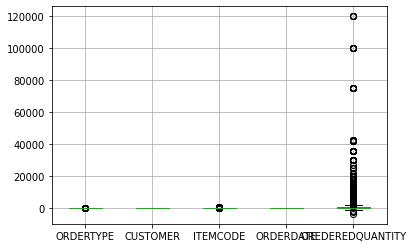

In [24]:
df.boxplot()

In [25]:
# By summary of staistics,negative values are there and that rows can be dropped or replaced with 0 
# '-'can replaced with empty space using regex.(#Checking with domain experts we can place it accordingly )

# Here i replaced all negative values with 0. 

df[df['OREDEREDQUANTITY']<0] =0

In [26]:
df.describe()

,ORDERTYPE,CUSTOMER,ITEMCODE,ORDERDATE,OREDEREDQUANTITY
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,0.244707,136.195945,136.893313,178.316241,805.616802
std,0.431547,80.449751,142.185213,104.168389,2717.814670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,58.000000,26.000000,90.000000,72.000000
50%,0.000000,144.000000,87.000000,180.000000,250.000000
75%,0.000000,211.000000,158.000000,267.000000,960.000000
max,3.000000,278.000000,527.000000,364.000000,120000.000000


In [27]:
# Selecting the predictor variables

x=df.iloc[:,:-1].values

In [28]:
# Selecting class variable

y=df.iloc[:,4].values

In [32]:
# Splitting the data in train and test.

from sklearn.model_selection import train_test_split

In [33]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=10)

In [31]:
# Selecting the Classifier

from sklearn.ensemble import RandomForestRegressor

In [ ]:
r=RandomForestRegressor()

In [ ]:
r.fit(xtrain,ytrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [ ]:
ypredict=r.predict(xtest)

In [ ]:
# Using R-sqaured or coefficient of deteremination is a statistical measure of how close the data are to the fitted 
# regression line

from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
r2_score(ypredict,ytest)

0.9342739505980229

In [ ]:
#mean_error=np.sqrt(mean_squared_error(ypredict,ytest))

In [ ]:
#mean_error